In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [40]:
facts_cost = pd.read_csv('/Users/melaniealvarez/Documents/Octavo semestres/Data Mining/Alvarez. Parcial1/data/ml/facts_total_cost_by_month.csv')
print(facts_cost.head())

   user_id  month  total_messages  total_gb  total_minutes first_name  \
0     1000     12            11.0   1901.47         116.83   Anamaria   
1     1001      8            30.0   6919.15         171.14     Mickey   
2     1001      9            44.0  13314.82         297.69     Mickey   
3     1001     10            53.0  22330.49         374.11     Mickey   
4     1001     11            36.0  18504.30         380.57     Mickey   

   last_name  age                                   city    reg_date  ...  \
0      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ...   
1  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA  2018-08-13  ...   
2  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA  2018-08-13  ...   
3  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA  2018-08-13  ...   
4  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA  2018-08-13  ...   

  minutes_included usd_monthly_pay  usd_per_gb  usd_per_message  \
0             3000             

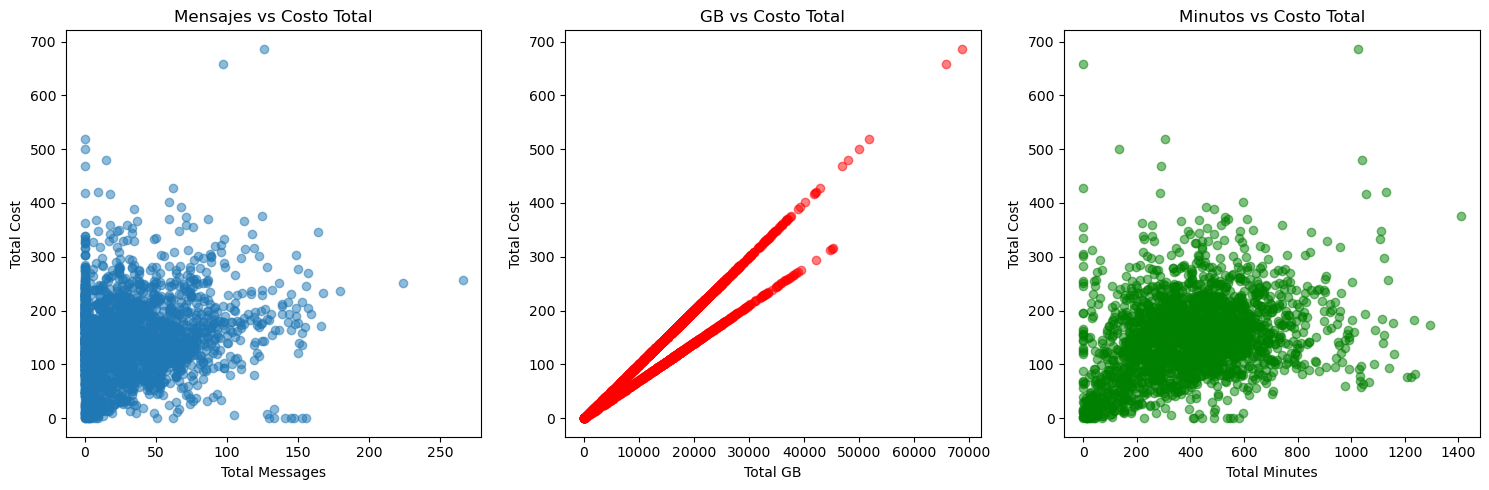

In [41]:
# Graficar los datos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico de dispersión para total_messages vs total_cost
axes[0].scatter(facts_cost['total_messages'], facts_cost['total_cost'], alpha=0.5)
axes[0].set_xlabel("Total Messages")
axes[0].set_ylabel("Total Cost")
axes[0].set_title("Mensajes vs Costo Total")

# Gráfico de dispersión para total_gb vs total_cost
axes[1].scatter(facts_cost['total_gb'], facts_cost['total_cost'], alpha=0.5, color='r')
axes[1].set_xlabel("Total GB")
axes[1].set_ylabel("Total Cost")
axes[1].set_title("GB vs Costo Total")

# Gráfico de dispersión para total_minutes vs total_cost
axes[2].scatter(facts_cost['total_minutes'], facts_cost['total_cost'], alpha=0.5, color='g')
axes[2].set_xlabel("Total Minutes")
axes[2].set_ylabel("Total Cost")
axes[2].set_title("Minutos vs Costo Total")

plt.tight_layout()
plt.show()

In [42]:
# Cargar los datos del CSV
file_path = "/Users/melaniealvarez/Documents/Octavo semestres/Data Mining/Alvarez. Parcial1/data/ml/facts_total_cost_by_month.csv"
df = pd.read_csv(file_path)

# Seleccionar características y variable objetivo
X = df[['total_messages', 'total_gb', 'total_minutes']]
y = df['total_cost']

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos de regresión
models = {
    "Regresión Lineal": LinearRegression(),
    "Gradient Descent (SGD)": SGDRegressor(max_iter=1000, tol=1e-3),
    "Regresión Polinomial (grado 2)": make_pipeline(PolynomialFeatures(2), LinearRegression()),
    "Regresión Polinomial (grado 3)": make_pipeline(PolynomialFeatures(3), LinearRegression())
}

# Diccionario para almacenar métricas
metrics = {}

# Entrenar modelos y calcular métricas
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics[name] = {"RMSE": rmse, "MAE": mae, "R^2": r2}

# Convertir métricas a DataFrame para visualizar mejor
metrics_df = pd.DataFrame(metrics).T

# Mostrar resultados
print(metrics_df)

                                        RMSE           MAE           R^2
Regresión Lineal                2.535215e+01  2.143774e+01  8.739603e-01
Gradient Descent (SGD)          4.056318e+16  3.668881e+16 -3.226574e+29
Regresión Polinomial (grado 2)  2.496671e+01  2.130506e+01  8.777638e-01
Regresión Polinomial (grado 3)  2.464066e+01  2.097213e+01  8.809355e-01


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Cargar los datos del CSV
file_path = "/Users/melaniealvarez/Documents/Octavo semestres/Data Mining/Alvarez. Parcial1/data/ml/facts_total_cost_by_month.csv"
df = pd.read_csv(file_path)

# Seleccionar características y variable objetivo
X = df[['total_messages', 'total_gb', 'total_minutes']]
y = df['total_cost']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelos de regresión
models = {
    "Regresión Lineal": LinearRegression(),
    "Gradient Descent (SGD)": SGDRegressor(max_iter=1000, tol=1e-3),
    "Regresión Polinomial (grado 2)": make_pipeline(PolynomialFeatures(2), StandardScaler(), LinearRegression()),
    "Regresión Polinomial (grado 3)": make_pipeline(PolynomialFeatures(3), StandardScaler(), LinearRegression()),
    "Regresión Polinomial (grado 4)": make_pipeline(PolynomialFeatures(4), StandardScaler(), LinearRegression()),
    "Regresión Polinomial (grado 5)": make_pipeline(PolynomialFeatures(5), StandardScaler(), LinearRegression()),
    "Regresión Ridge": Ridge(alpha=1.0),
    "Regresión Lasso": Lasso(alpha=0.1)
}

# Diccionario para almacenar métricas
metrics = {}

# Entrenar modelos y calcular métricas
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics[name] = {"RMSE": rmse, "MAE": mae, "R^2": r2}

    # Imprimir coeficientes para modelos que los tengan
    if hasattr(model, 'coef_'):
        print(f"Coeficientes de {name}: {model.coef_}")

# Convertir métricas a DataFrame para visualizar mejor
metrics_df = pd.DataFrame(metrics).T

# Mostrar resultados
print(metrics_df)

Coeficientes de Regresión Lineal: [-3.17414295 70.65362595  1.25195551]
Coeficientes de Gradient Descent (SGD): [-3.09790269 70.61690939  1.44254278]
Coeficientes de Regresión Ridge: [-3.16634146 70.61071359  1.26315254]
Coeficientes de Regresión Lasso: [-3.02832229 70.55940313  1.14256775]
                                     RMSE        MAE       R^2
Regresión Lineal                25.352155  21.437737  0.873960
Gradient Descent (SGD)          25.347884  21.400337  0.874003
Regresión Polinomial (grado 2)  24.966705  21.305057  0.877764
Regresión Polinomial (grado 3)  24.640655  20.972119  0.880936
Regresión Polinomial (grado 4)  24.544933  20.613746  0.881859
Regresión Polinomial (grado 5)  25.235056  20.935677  0.875122
Regresión Ridge                 25.350589  21.438165  0.873976
Regresión Lasso                 25.358515  21.449246  0.873897
